# Основные концепции Machine Learning. Домашняя работа

In [33]:
### Тут нужно сделать импорты всех необходимых библиотек ###
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

In [34]:
matplotlib.rc("font", size=18)

In [35]:
### Здесь требуется загрузить датасет phones.csv ###
phones=pd.read_csv("phones.csv", sep=",")

In [36]:
phones.head()

,disk,os,price,year
0,64,Android,7256,2016
1,128,Android,7623,2015
2,64,Android,1916,2010
3,512,iOS,15045,2017
4,16,Android,4478,2013


In [37]:
phones.os.unique()

array(['Android', 'iOS'], dtype=object)

In [38]:
phones.os.replace(['Android', 'iOS'],[0, 1], inplace=True) # replace text column with dfigit, Android=10, iOS=1  
phones

,disk,os,price,year
0,64,0,7256,2016
1,128,0,7623,2015
2,64,0,1916,2010
3,512,1,15045,2017
4,16,0,4478,2013
...,...,...,...,...
95,512,1,8398,2011
96,64,0,7197,2016
97,32,0,5694,2014
98,32,0,7589,2016


In [39]:
### Опционально: используя matplotlib, можно сделать визуализацию загруженного датасета ###

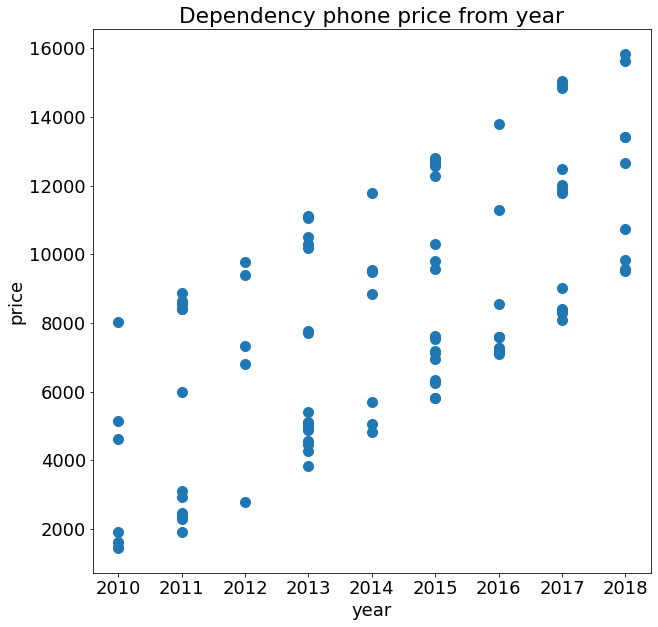

In [40]:
fig=plt.figure(figsize=(10,10))
ax=plt.axes()
plt.xlabel("year")
plt.ylabel("price")
plt.title ("Dependency phone price from year")
ax.scatter(phones.year, phones.price, s=100)
plt.show()

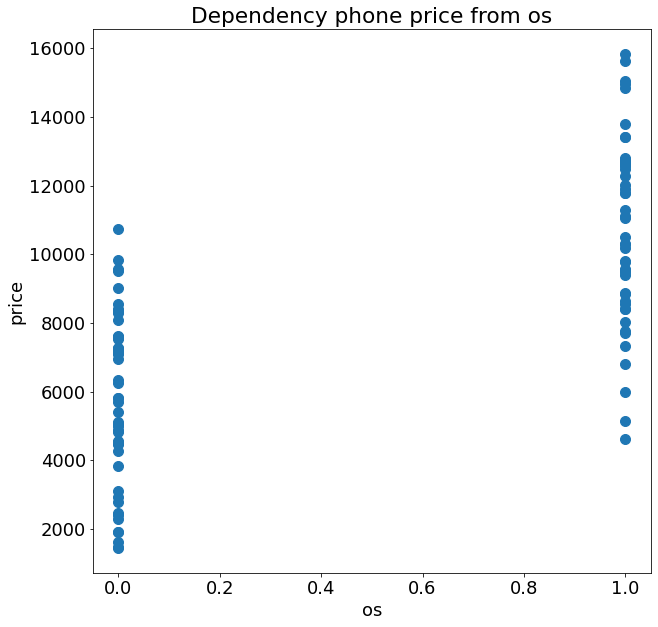

In [41]:
fig=plt.figure(figsize=(10,10))
ax=plt.axes()
plt.xlabel("os")
plt.ylabel("price")
plt.title ("Dependency phone price from os")
ax.scatter(phones.os, phones.price, s=100)
plt.show()

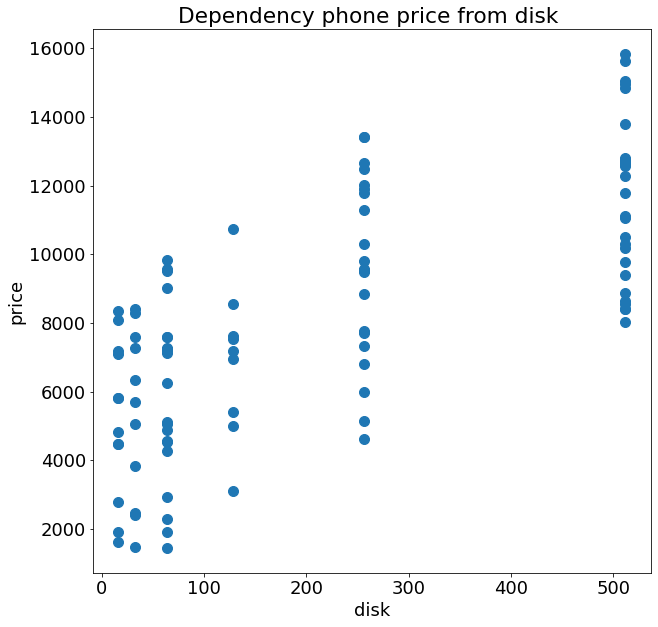

In [42]:
fig=plt.figure(figsize=(10,10))
ax=plt.axes()
plt.xlabel("disk")
plt.ylabel("price")
plt.title ("Dependency phone price from disk ")
ax.scatter(phones.disk, phones.price, s=100)
plt.show()

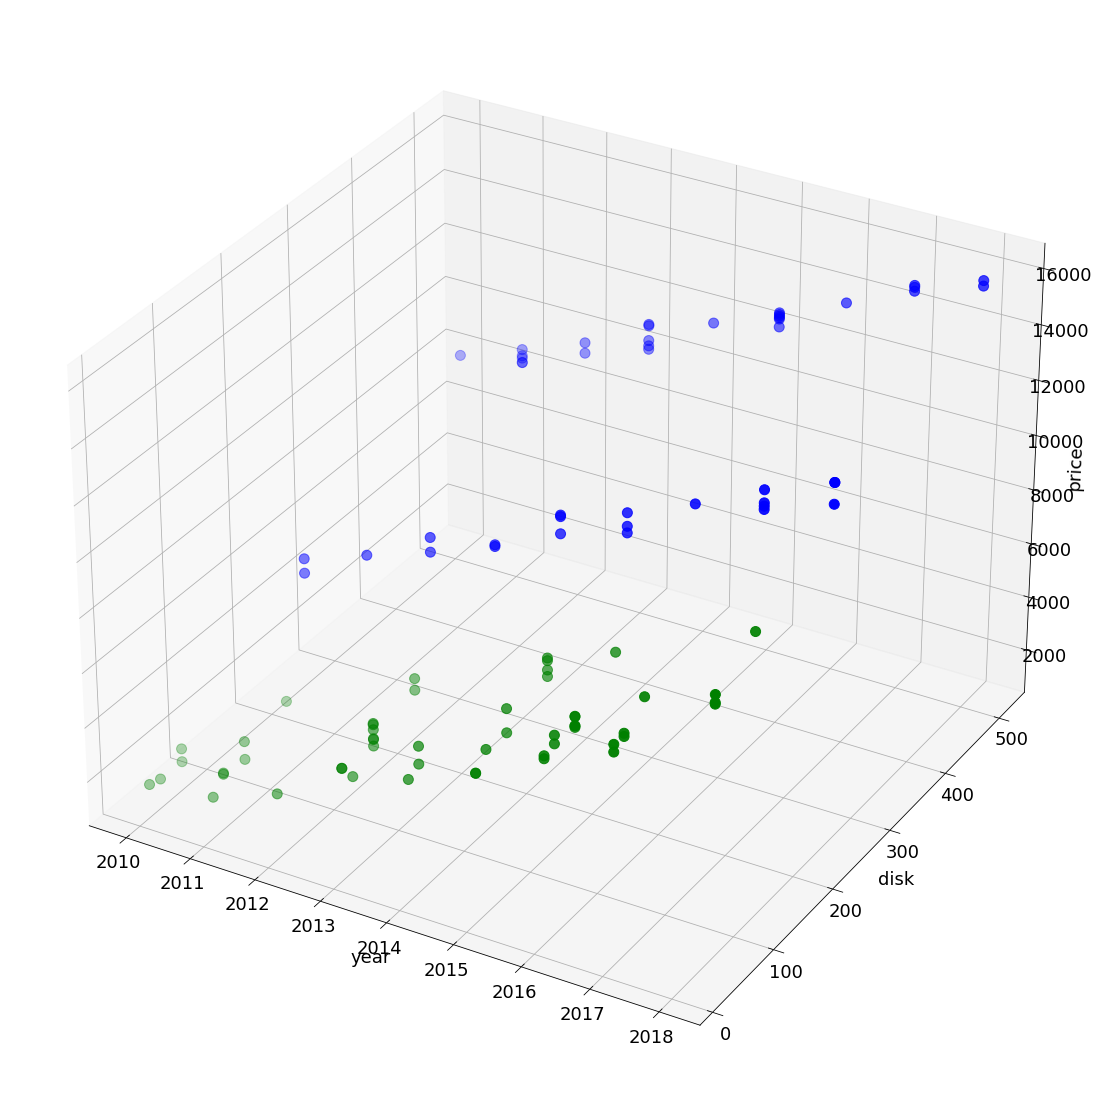

In [43]:
fig=plt.figure(figsize=(20,20))
ax = plt.axes(projection="3d")
ax.scatter(phones[phones.os==0].year, phones[phones.os==0].disk, phones[phones.os==0].price, s=100, color='green')
ax.scatter(phones[phones.os==1].year, phones[phones.os==1].disk, phones[phones.os==1].price, s=100, color='blue')
ax.set_xlabel('year')
ax.set_ylabel('disk')
ax.set_zlabel('price')
plt.show()

Задание 1: обучить модель регрессии

In [44]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
X=phones[['disk', 'os', 'year']]
y=phones['price']

In [45]:
### Здесь следует запустить процесс обучения ###
### и продемонстрировать работоспобность обученной модели ###
# price = price(disk, os, year) = a + b1 * disk + b2 * os +b3 * year
reg=LinearRegression().fit(X, y)
b1, b2, b3=reg.coef_
a=reg.intercept_
def reg_prediction(disk, os, year):
    return a+b1*disk+b2*os+b3*year
reg_prediction(X.disk[0], X.os[0], X.year[0])

7664.43620642717

In [46]:
reg.predict(X[0:1])[0]

7664.43620642717

In [47]:
disk_, os_, year_=list(), list(), list()
for x in np.linspace(min(phones.disk), max(phones.disk), 100):
    for y in np.linspace(min(phones.os), max(phones.os), 100):
        for z in np.linspace(min(phones.year), max (phones.year), 100):
            disk_.append(x)
            os_.append(y)
            year_.append(z)
disk_=np.array(disk_).reshape(-1, 1)
os_=np.array(os_).reshape(-1,1)
year_=np.array(year_).reshape(-1,1)
p=reg.predict(np.concatenate([disk_, os_, year_], axis=1))
print(p)
print(len(p))

[ 1090.55643327  1172.38148752  1254.20654177 ... 15577.47982228
 15659.30487653 15741.12993078]
1000000


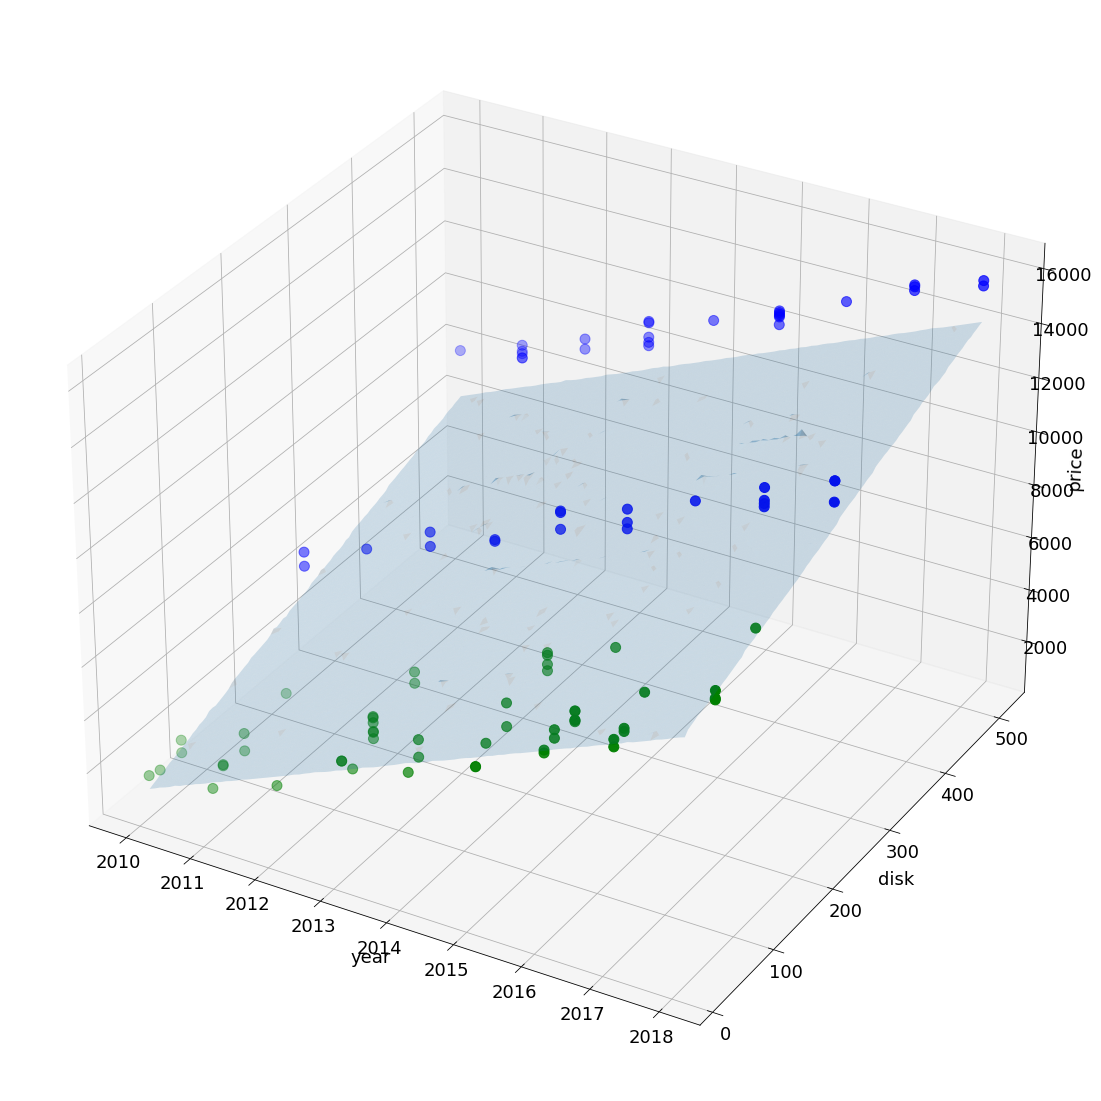

In [48]:
fig=plt.figure(figsize=(20,20))
ax = plt.axes(projection="3d")
ax.scatter(phones[phones.os==0].year, phones[phones.os==0].disk, phones[phones.os==0].price, s=100, color='green')
ax.scatter(phones[phones.os==1].year, phones[phones.os==1].disk, phones[phones.os==1].price, s=100, color='blue')
ax.set_xlabel('year')
ax.set_ylabel('disk')
ax.set_zlabel('price')

ax.plot_trisurf(year_.ravel(), disk_.ravel(), p.ravel(), alpha=0.2)

ax.evel=27
plt.show()

Задание 2: обучить модель классификации

In [56]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

In [57]:
phones=pd.read_csv("phones.csv", sep=",")
phones.head()

,disk,os,price,year
0,64,Android,7256,2016
1,128,Android,7623,2015
2,64,Android,1916,2010
3,512,iOS,15045,2017
4,16,Android,4478,2013


In [58]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
# feature_0 -> disk
# feature_1 -> year
# feature_2 -> price
X = phones[['disk', 'year', 'price']]
y = phones['os']

In [61]:
### Здесь следует запустить процесс обучения ###
### и продемонстрировать работоспобность обученной модели ###
cl = DecisionTreeClassifier().fit(X, y)
print(export_text(cl))

|--- feature_0 <= 192.00
|   |--- class: Android
|--- feature_0 >  192.00
|   |--- class: iOS



In [65]:
print(cl.predict(X[7:8])[0], y[7])
print(cl.predict(X[30:35])[0], y[30])

Android Android
iOS iOS


Задание 3: обучить модель кластеризации

In [165]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [166]:
matplotlib.rc("font", size=18)
phones=pd.read_csv('phones.csv', sep=',')
phones.head()

,disk,os,price,year
0,64,Android,7256,2016
1,128,Android,7623,2015
2,64,Android,1916,2010
3,512,iOS,15045,2017
4,16,Android,4478,2013


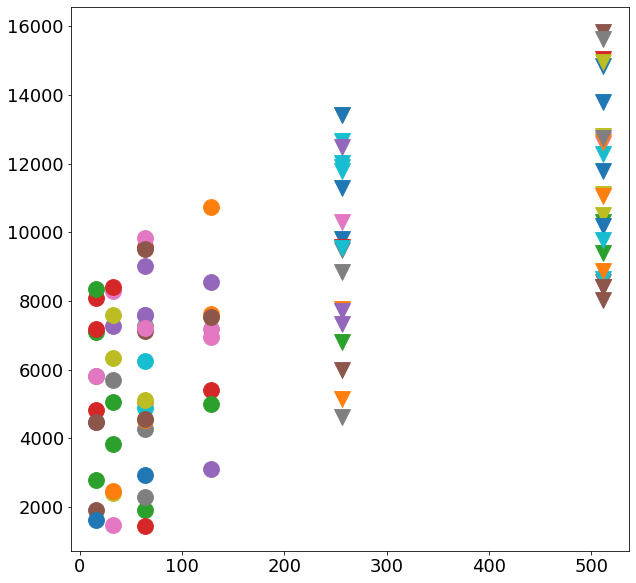

In [167]:
fig=plt.figure(figsize=(10,10))
markers={"Android":"o", "iOS":"v"}
for disk, price, year, l in zip (phones.disk, phones.price, phones.year, phones.os):
    plt.scatter(disk, price, s=250, marker=markers[l])
#     plt.scatter(disk, year, s=250, marker=markers[l])
#     plt.scatter(price, year, s=250, marker=markers[l])
plt.show()

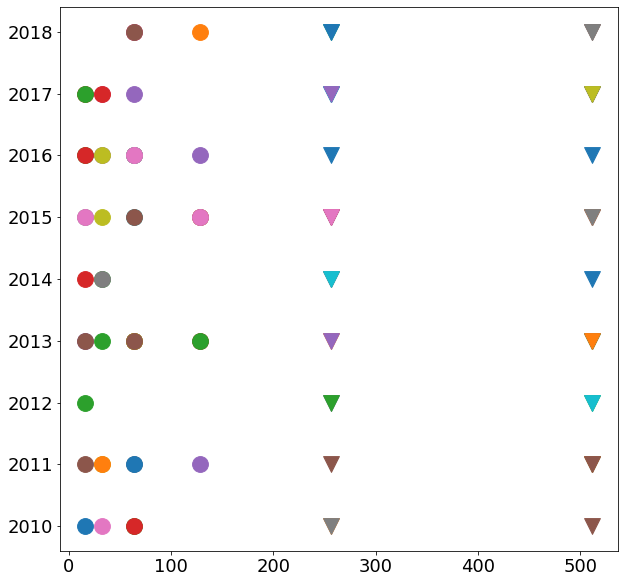

In [168]:
fig=plt.figure(figsize=(10,10))
markers={"Android":"o", "iOS":"v"}
for disk, price, year, l in zip (phones.disk, phones.price, phones.year, phones.os):
#     plt.scatter(disk, price, s=250, marker=markers[l])
    plt.scatter(disk, year, s=250, marker=markers[l])
#     plt.scatter(price, year, s=250, marker=markers[l])
plt.show()

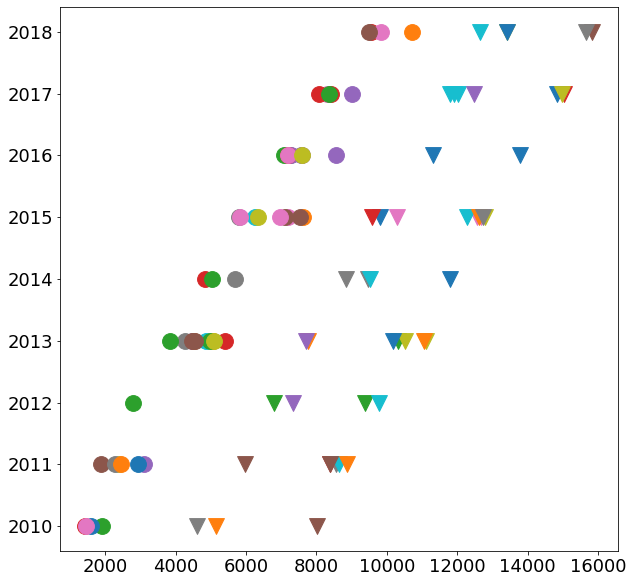

In [169]:
fig=plt.figure(figsize=(10,10))
markers={"Android":"o", "iOS":"v"}
for disk, price, year, l in zip (phones.disk, phones.price, phones.year, phones.os):
#     plt.scatter(disk, price, s=250, marker=markers[l])
#     plt.scatter(disk, year, s=250, marker=markers[l])
    plt.scatter(price, year, s=250, marker=markers[l])
plt.show()

In [170]:
## Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
X = phones[['disk', 'price', 'year']]

In [171]:
### Здесь следует запустить процесс обучения ###
### и продемонстрировать работоспобность обученной модели ###

clust = KMeans(n_clusters=2).fit(X)

In [172]:
c1, c2=clust.cluster_centers_

In [173]:
clust.cluster_centers_

array([[  116.8       ,  5784.78333333,  2013.35      ],
       [  368.        , 11601.65      ,  2015.525     ]])

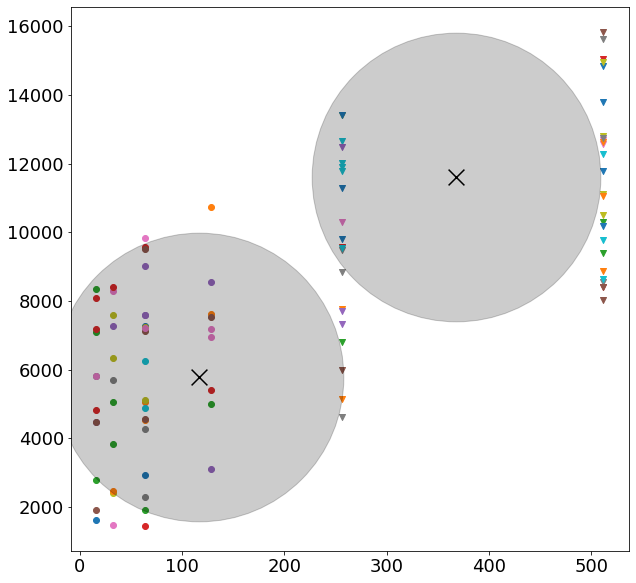

In [174]:
fig = plt.figure(figsize=(10, 10))
markers={"Android":"o","iOS":"v"}
for disk_, price_, year_, l in zip (phones.disk, phones.price, phones.year, phones.os):
    plt.scatter(disk_, price_, marker=markers[l])
plt.scatter(c1[0], c1[1], s=250, marker="x", c="black")
plt.scatter(c1[0], c1[1], s=250 * 1e3/3, c="black", alpha=0.2)
plt.scatter(c2[0], c2[1], s=250, marker="x", c="black")
plt.scatter(c2[0], c2[1], s=250 * 1e3/3, c="black", alpha=0.2)
plt.show()